In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
plt.style.use("ggplot")

### **Binary Classification**

In [3]:
loan_data = pd.read_csv("data/Loan-Data.csv")

In [4]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [5]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   credit.policy      9578 non-null   int64  
 1   purpose            9578 non-null   object 
 2   int.rate           9578 non-null   float64
 3   installment        9578 non-null   float64
 4   log.annual.inc     9578 non-null   float64
 5   dti                9578 non-null   float64
 6   fico               9578 non-null   int64  
 7   days.with.cr.line  9578 non-null   float64
 8   revol.bal          9578 non-null   int64  
 9   revol.util         9578 non-null   float64
 10  inq.last.6mths     9578 non-null   int64  
 11  delinq.2yrs        9578 non-null   int64  
 12  pub.rec            9578 non-null   int64  
 13  not.fully.paid     9578 non-null   int64  
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [6]:
(loan_data["not.fully.paid"].value_counts() / len(loan_data)).round(2)

not.fully.paid
0    0.84
1    0.16
Name: count, dtype: float64

In [7]:
loan_data.loc[:, "credit.policy":"pub.rec"].describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000


In [8]:
loan_data["purpose"].value_counts()

purpose
debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: count, dtype: int64

In [9]:
aux = pd.get_dummies(loan_data, columns=["purpose"], drop_first=True, dtype=int)

X = aux.drop("not.fully.paid", axis=1).values
y = aux["not.fully.paid"].values

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.8, random_state=125, stratify=y
)

##### **Bayesian Classifier**

In [11]:
P0_train = sum(y_train == 0) / len(y_train)
P1_train = sum(y_train == 1) / len(y_train)

In [12]:
X0_train = X_train[y_train == 0]
X1_train = X_train[y_train == 1]

mu0_train = np.mean(X0_train, axis=0)
mu1_train = np.mean(X1_train, axis=0)

S0_train = np.cov(X0_train, rowvar=False)
S1_train = np.cov(X1_train, rowvar=False)

# S0_train = np.diag(np.diag(S0_train))
# S1_train = np.diag(np.diag(S1_train))

In [13]:
def g0(x):

    S0_train_inv = np.linalg.inv(S0_train)
    S0_train_det = np.linalg.det(S0_train)

    W0 = - S0_train_inv / 2
    w0 = S0_train_inv @ mu0_train
    b0 = - (mu0_train.T @ S0_train_inv @ mu0_train + np.log(S0_train_det)) / 2 + np.log(P0_train)

    return x.T @ W0 @ x + w0.T @ x + b0


def g1(x):

    S1_train_inv = np.linalg.inv(S1_train)
    S1_train_det = np.linalg.det(S1_train)

    W1 = - S1_train_inv / 2
    w1 = S1_train_inv @ mu1_train
    b1 = - (mu1_train.T @ S1_train_inv @ mu1_train + np.log(S1_train_det)) / 2 + np.log(P1_train)

    return x.T @ W1 @ x + w1.T @ x + b1


def classifier(x):
    if g1(x) > g0(x):
        return 1
    else:
        return 0

In [14]:
n_test = X_test.shape[0]

y_pred = np.zeros_like(y_test)
for i in range(n_test):
    y_pred[i] = classifier(X_test[i])

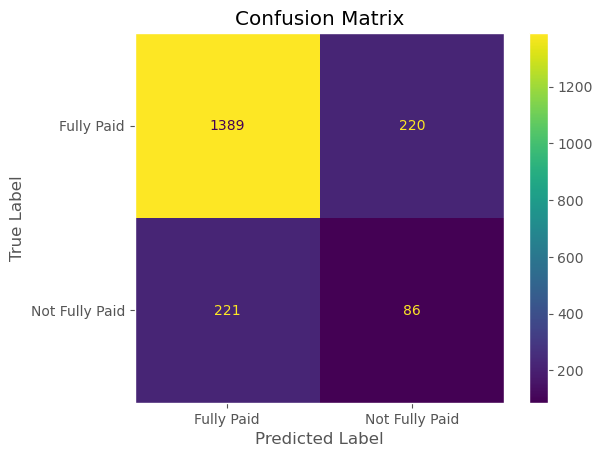

              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1609
           1       0.28      0.28      0.28       307

    accuracy                           0.77      1916
   macro avg       0.57      0.57      0.57      1916
weighted avg       0.77      0.77      0.77      1916



In [15]:
cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fully Paid", "Not Fully Paid"])
cm.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))

##### **Naive Bayes Classifier**

In [16]:
clf = GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [17]:
y_pred = clf.predict(X_test)

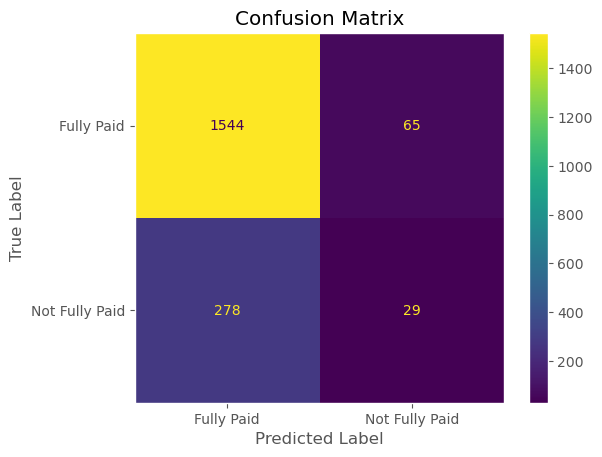

              precision    recall  f1-score   support

           0       0.85      0.96      0.90      1609
           1       0.31      0.09      0.14       307

    accuracy                           0.82      1916
   macro avg       0.58      0.53      0.52      1916
weighted avg       0.76      0.82      0.78      1916



In [18]:
cm = confusion_matrix(y_test, y_pred)
cm = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fully Paid", "Not Fully Paid"])
cm.plot()

plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")

plt.grid(False)

plt.show()

print(classification_report(y_test, y_pred))